In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from datetime import date, timezone, timedelta
import pandas as pd
import numpy as np
import utils
import yfinance as yf
from spreads_prep import spreads_prep
from backtest import backtest
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

# Create option data by DTE

If you want to generate spreads on specific DTE that is not included in the preload folder, please see the section below for codes. Otherwise, skip to the next section. With Core-i9 and DDR5, the average process time for generate one dataset range from 240s to 600s depending on your DTE setting. It requres around 12GB of RAM.

In [118]:
tk = 'SPY'
op, st = utils.prep_op_st_df(_ticker = tk)
spread_prep = spreads_prep(op, st)

for d in [7]:
    calls, puts = spread_prep.get_all_spreads(_DTE = d)
    calls.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
    puts.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')
    # For Mac, Use: 
#     calls.to_csv('Spreads_Data/' + tk + '/DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
#     puts.to_csv('Spreads_Data/' + tk + '/DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')

C:\Users\27270\Option_Spreads_Backtesting\utils.py:69: DtypeWarning: Columns (9,10,11,12,13,16,18,19,21,22,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


[*********************100%***********************]  1 of 1 completed
Start date: 2010-01-01
End date: 2022-12-31
Done Cleaning Data! CPU time: 3.06 seconds, Total time: 13.82 seconds
Done Calculating Probability! CPU time: 0.56 seconds, Total time: 5.39 seconds
Start searching for spreads from 2010-01-15 to 2022-12-30
Done Calculating All Spreads with DTE = 7! CPU time: 75.97 seconds, Total time: 643.12 seconds


# Use preloaded spread data

In [254]:
tk = 'SPY'

df_stock = utils.OHLC_info_by_range(tk,'2010-01-01','2022-12-31',interval = '1d')
st = df_stock.copy()

[*********************100%***********************]  1 of 1 completed
Start date: 2010-01-01
End date: 2022-12-31


In [255]:
# Avaliable DTE:  [1,3,5,7,14,28]
DTE = 7

calll = pd.read_csv('Spreads_Data\\SPY\\DTE' + str(DTE) + '_SPY_calls_2010_2022.csv',index_col = 0)
puttt = pd.read_csv('Spreads_Data\\SPY\\DTE' + str(DTE) + '_SPY_puts_2010_2022.csv',index_col = 0)
calll.shape, puttt.shape

((766907, 19), (2128758, 19))

In [311]:
backtest_class = backtest(_spread_data = (calll, puttt), _stock_data = st)

In [373]:
# Change the following parameters to create a filtering strategy.
def define_parm():
    min_EXPECTED_EARN = None
    min_EARN_RATIO = 0.01
    
    min_SELL_OTM_PROB = 0.75
    min_BUY_OTM_PROB = 0.8
    
    min_width = None
    max_width = None
    
    max_trades_per_day = 1
    
    min_PREMIUM = 0.1
    
    parm = (min_EXPECTED_EARN,min_EARN_RATIO,min_SELL_OTM_PROB,
                   min_BUY_OTM_PROB,min_width,max_width,max_trades_per_day,min_PREMIUM)
    
    return parm

## Results with only the parameters

Done backtesting from 2010-12-31 00:00:00 to 2022-12-23 00:00:00!
Call: 146 trades, win rate: 0.7603 profits: 4.04
Put: 434 trades, win rate: 0.9147 profits: 17.81


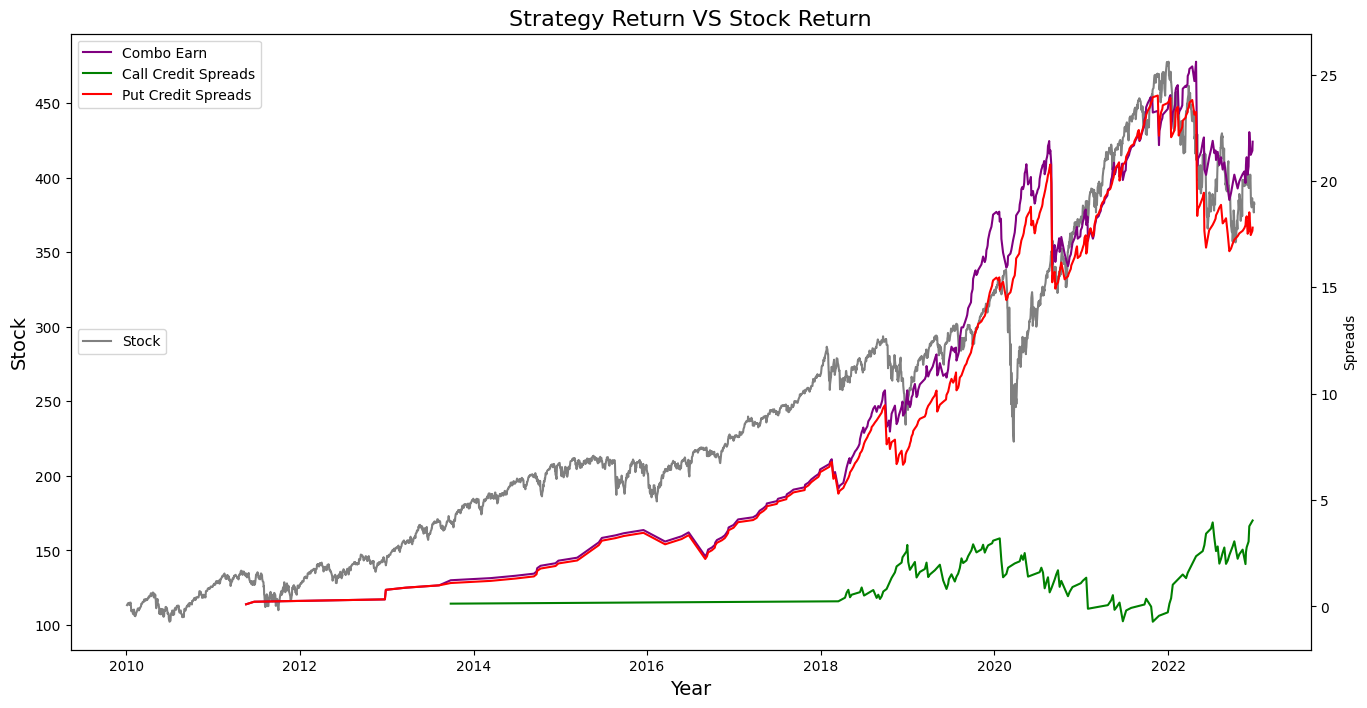

In [374]:
# Set Parameter Above
backtest_class.set_parm(define_parm(), start_date = None, end_date = None)
backtest_class.go()
backtest_class.win_rate()

# Print the return graph
backtest_class.draw_result(_st = st, _show = 'ALL')
# backtest_class.report('BOTH')

## Result with only the technical indicators

Done backtesting from 2010-12-31 00:00:00 to 2022-12-23 00:00:00!
Call: 201 trades, win rate: 0.607 profits: 7.56
Put: 173 trades, win rate: 0.9538 profits: 4.56


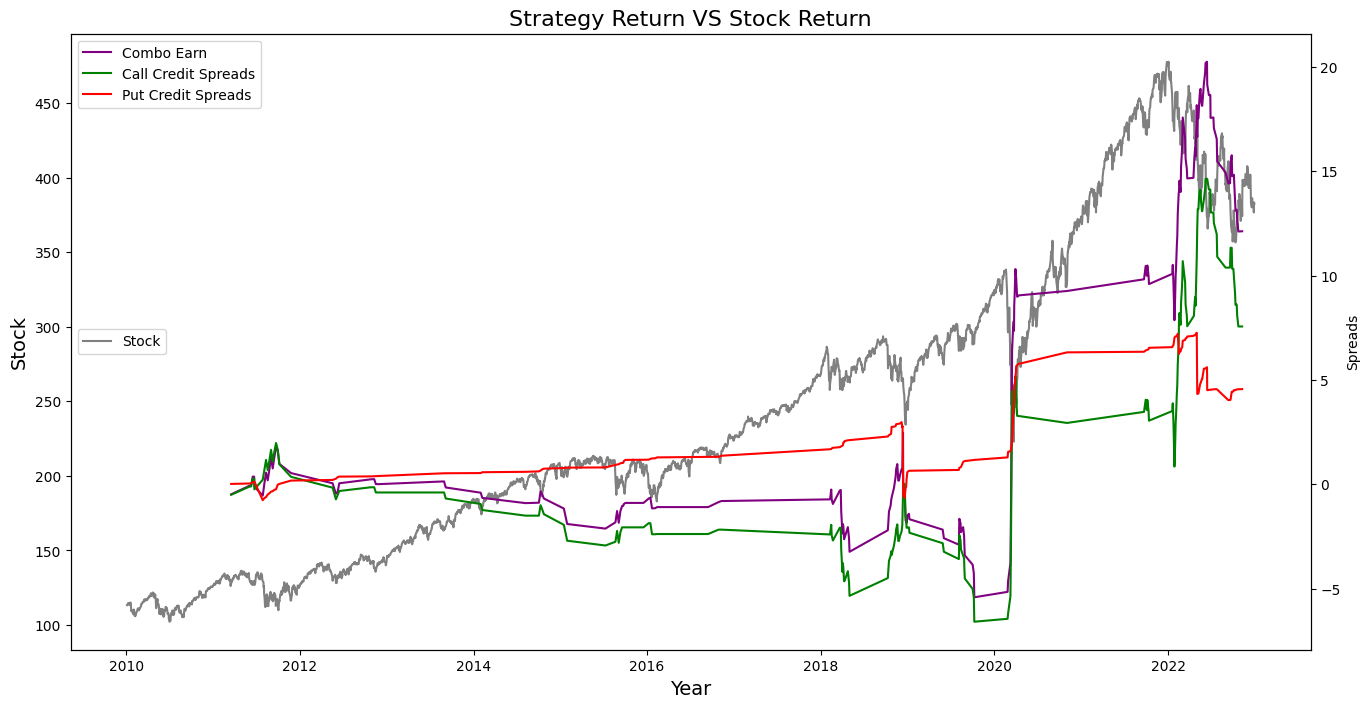

In [375]:
backtest_class.set_parm(start_date = None, end_date = None)
backtest_class.technical_indicator_search(_min_iv_ratio = 1, opion_type = 'BOTH', )
backtest_class.win_rate()
# Print the return graph
backtest_class.draw_result(_st = st, _show = 'ALL')
# backtest_class.report('BOTH')

## Results with both indicators and parameters

Done backtesting from 2010-12-31 00:00:00 to 2022-12-23 00:00:00!
Call: 9 trades, win rate: 1.0 profits: 3.62
Put: 40 trades, win rate: 0.975 profits: 1.92


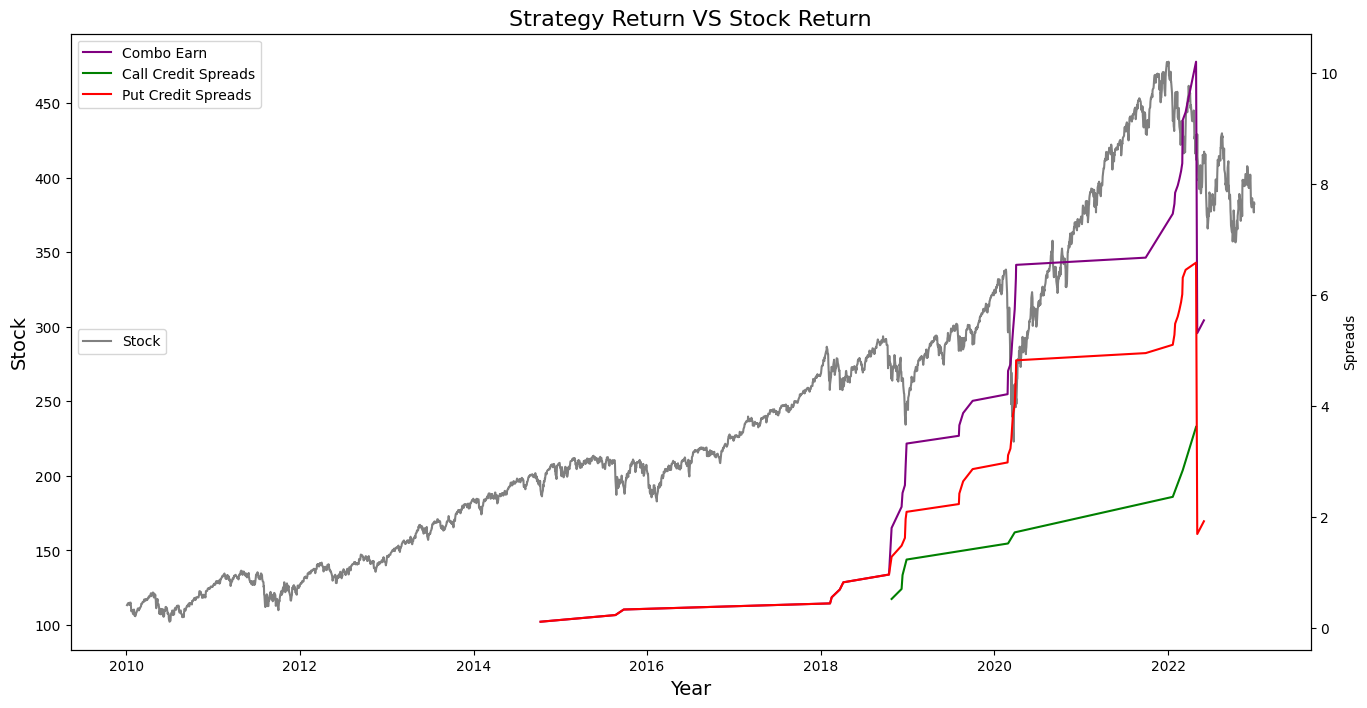

In [376]:
backtest_class.set_parm(define_parm(),start_date = None, end_date = None)
backtest_class.technical_indicator_search(_min_iv_ratio = 1, opion_type = 'BOTH', )
backtest_class.win_rate()
# Print the return graph
backtest_class.draw_result(_st = st, _show = 'ALL')
# backtest_class.report('BOTH')

## To acess trades data and report

In [380]:
# To Acess Stastiscal Report on strategy
backtest_class.report('BOTH')

Credit Call:

Number of Positions: 9
Win Rate: 1.0
Total Return: 3.62
Max Collateral: 3.0
Max Drawdown: 0.52 Date: 2018-10-26 00:00:00
Max Individual Loss: 0.18 id: 196200
Max Individual Gain: 0.78 id: 546799
Average Collateral: 1.67
Average Gain: 0.4
Average Expectation: 0.79

Credit Put:

Number of Positions: 40
Win Rate: 0.975
Total Return: 1.92
Max Collateral: 5.5
Max Drawdown: 0.11 Date: 2014-10-10 00:00:00
Max Individual Loss: -4.89 id: 1887761
Max Individual Gain: 0.34 id: 809351
Average Collateral: 2.56
Average Gain: 0.05
Average Expectation: 0.93


In [378]:
# To Acess the Trades df
print('Number of Calls:',backtest_class.call_satisfied.shape, 'Number of Puts:',backtest_class.put_satisfied.shape)
print(backtest_class.call_satisfied.columns)
# Retrieve trade data from class.call_satisfied and class.put_satisfied
backtest_class.call_satisfied.head()

Number of Calls: (9, 31) Number of Puts: (40, 31)
Index(['QUOTE_TIME_EST', 'SELL_PRICE', 'BUY_PRICE', 'DTE', 'isCALL',
       'SELL_STRIKE', 'BUY_STRIKE', 'PREMIUM', 'MAX_LOSS', 'SELL_ATM_IV',
       'BUY_ATM_IV', 'SELL_IV', 'BUY_IV', 'EXPECTED_EARN',
       'EXPECTED_EARN_RATIO', 'BUY_OTM_PROB', 'SELL_OTM_PROB', 'CURRENT_PRICE',
       'PRICE@EXPIRE', 'HIST_VOLATILITY', 'RSI', 'EMA_252', 'EMA_50', 'EMA_7',
       'EMA_DTE', 'TREND', 'TREND_REVERSAL', 'WIDTH', 'ACTUAL_EARN',
       'CUM_EARN', 'WIN'],
      dtype='object')


,QUOTE_TIME_EST,SELL_PRICE,BUY_PRICE,DTE,isCALL,SELL_STRIKE,BUY_STRIKE,PREMIUM,MAX_LOSS,SELL_ATM_IV,...,EMA_252,EMA_50,EMA_7,EMA_DTE,TREND,TREND_REVERSAL,WIDTH,ACTUAL_EARN,CUM_EARN,WIN
188332,2018-10-26,1.26,0.74,7.0,1,272.0,274.0,0.52,1.48,0.20880,...,272.262817,281.779193,270.936972,270.936972,0.0,0.0,2.0,0.52,0.52,True
196200,2018-12-07,0.74,0.56,7.0,1,272.0,273.0,0.18,0.82,0.19420,...,272.098971,274.678072,269.965901,269.965901,0.0,0.0,1.0,0.18,0.70,True
196553,2018-12-11,0.86,0.61,7.0,1,271.0,272.0,0.25,0.75,0.19988,...,271.973007,273.864733,267.401447,267.401447,0.0,0.0,1.0,0.25,0.95,True
203013,2018-12-28,1.27,0.99,7.0,1,255.0,256.0,0.28,0.72,0.21138,...,270.089182,264.943563,247.470370,247.470370,0.0,0.0,1.0,0.28,1.23,True
248116,2020-02-28,1.93,1.64,7.0,1,311.0,312.0,0.29,0.71,0.35806,...,303.363644,323.274008,311.798364,311.798364,0.0,0.0,1.0,0.29,1.52,True


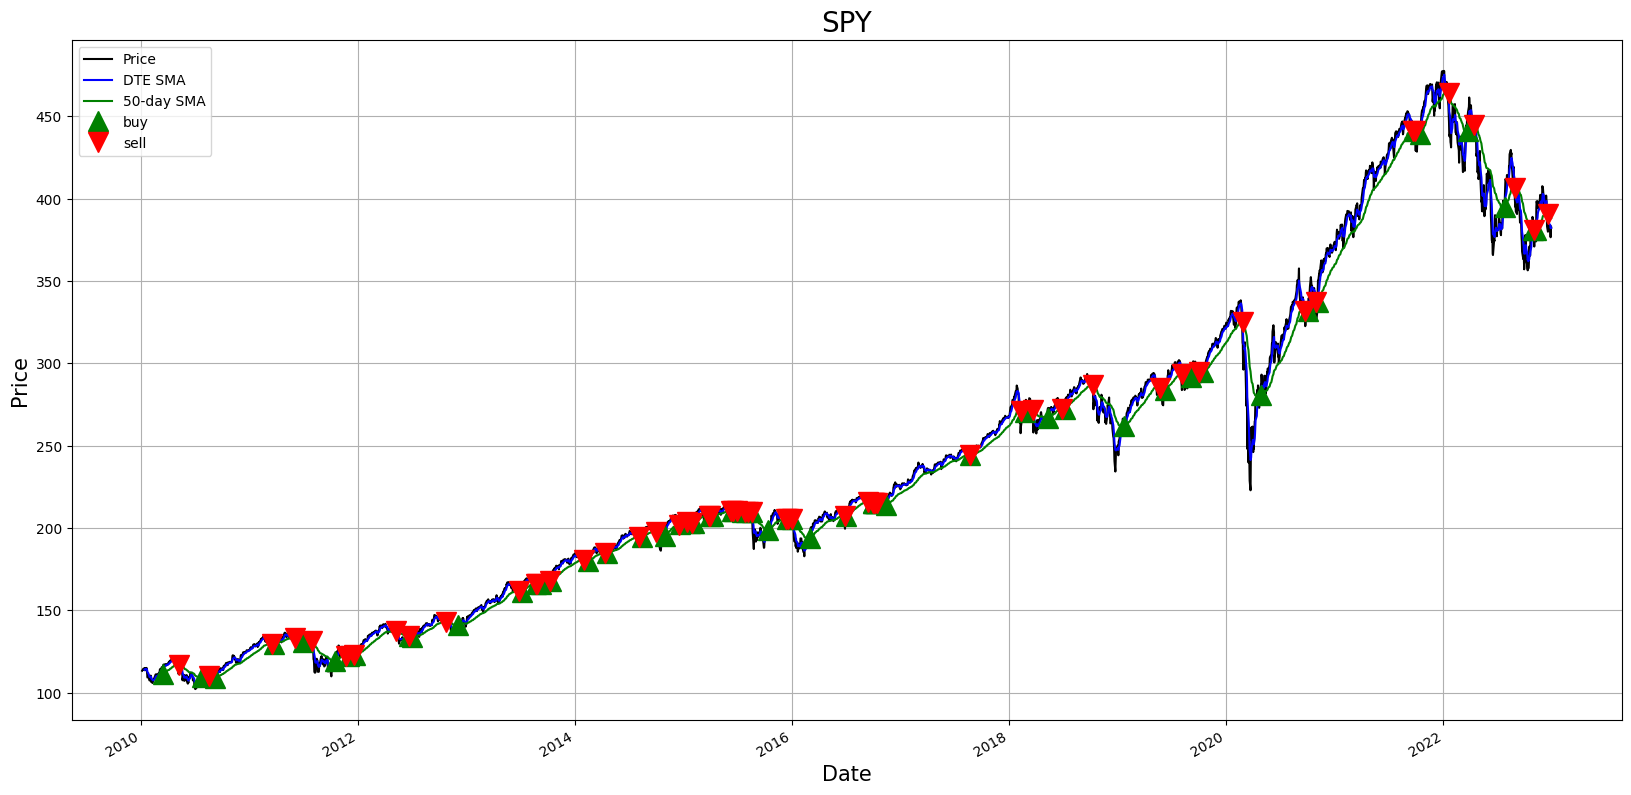

In [379]:
# Crossover plot

df_ = backtest_class.stock_data

df_.index = df_.DATE
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
df_['CLOSE'].plot(color = 'k', label= 'Price') 
df_['EMA_DTE'].plot(color = 'b',label = 'DTE SMA') 
df_['EMA_50'].plot(color = 'g', label = '50-day SMA')
# plot ‘buy’ signals
plt.plot(df_[df_['TREND_REVERSAL'] == 1].index, 
         df_['EMA_50'][df_['TREND_REVERSAL'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(df_[df_['TREND_REVERSAL'] == -1].index, 
         df_['EMA_50'][df_['TREND_REVERSAL'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SPY', fontsize = 20)
plt.legend()
plt.grid()
plt.show()